In [186]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
data = pd.read_csv("titanic_data.csv")

In [188]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [190]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Sex and Survived relation

Percentage of Women who survived 74.20382165605095
Percentage of Men who survived 18.890814558058924


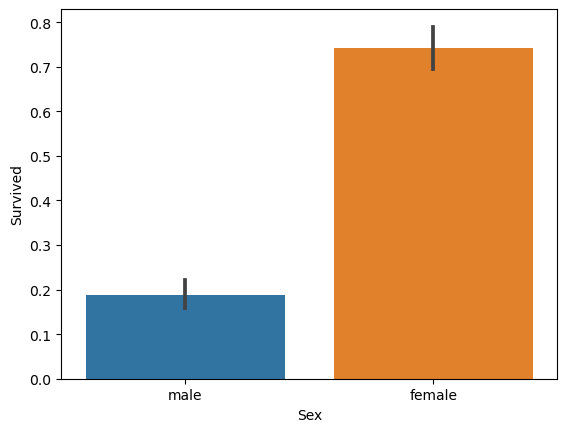

In [191]:
sns.barplot(x = 'Sex', y = 'Survived', data = data)

#print percentage
print('Percentage of Women who survived', data['Survived'][data['Sex'] == 'female'].value_counts(normalize = True)[1]* 100)
                                                           
print('Percentage of Men who survived', data['Survived'][data['Sex'] == 'male'].value_counts(normalize = True)[1]* 100)                                                           

##### PClass

Percentage of Pclass = 1 who survived 62.96296296296296
Percentage of Pclass = 2 who survived 47.28260869565217
Percentage of Pclass = 3 who survived 24.236252545824847


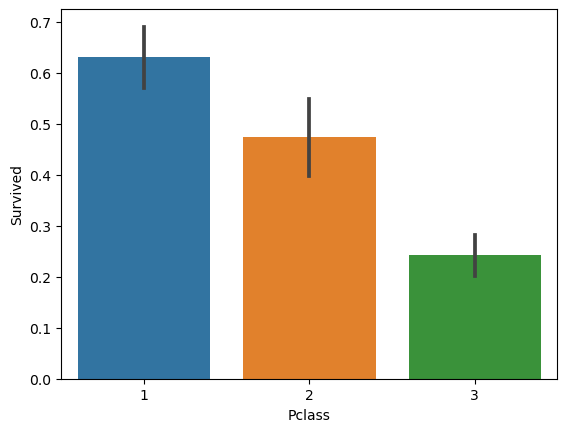

In [192]:
sns.barplot(x = 'Pclass', y = 'Survived', data = data)

print('Percentage of Pclass = 1 who survived', data['Survived'][data['Pclass'] == 1].value_counts(normalize = True)[1]* 100)
print('Percentage of Pclass = 2 who survived', data['Survived'][data['Pclass'] == 2].value_counts(normalize = True)[1]* 100)
print('Percentage of Pclass = 3 who survived', data['Survived'][data['Pclass'] == 3].value_counts(normalize = True)[1]* 100)


#### Age

* 0 -- 5 --> Baby
* 5 -- 12 --> Child
* 12 -- 18 --> teen
* 18 -- 24 --> student
* 24 -- 35 --> young adult
* 35 -- 60 --> adult
* 60 --> Senior

/Users/mannatsaluja/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


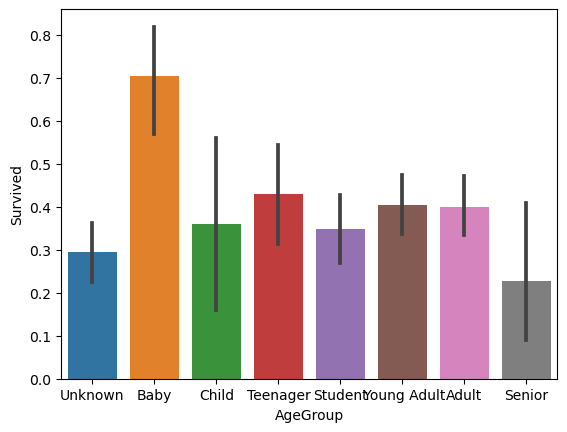

In [193]:
data.Age = data.Age.fillna(-0.5)

bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown','Baby','Child','Teenager', 'Student', ' Young Adult', 'Adult', 'Senior']

data["AgeGroup"] = pd.cut(data['Age'], bins, labels = labels)

sns.barplot(x = 'AgeGroup', y = 'Survived', data = data)
plt.show()

In [194]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup'],
      dtype='object')

In [195]:
data = data.drop(['Ticket','Cabin','Fare'], axis = 1)

In [196]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Embarked', 'AgeGroup'],
      dtype='object')

#### Dealing with Missing Values

In [197]:
print('Number of people embarking in Southampton (S) : ')
southampton = data[data['Embarked'] == 'S'].shape[0]
print(southampton)

print('Number of people embarking in Cherbourg (C) : ')
cherbourg = data[data['Embarked'] == 'C'].shape[0]
print(cherbourg)

print('Number of people embarking in Queenstown (Q) : ')
queenstown = data[data['Embarked'] == 'Q'].shape[0]
print(queenstown)

Number of people embarking in Southampton (S) : 
644
Number of people embarking in Cherbourg (C) : 
168
Number of people embarking in Queenstown (Q) : 
77


In [198]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       2
AgeGroup       0
dtype: int64

In [199]:
data = data.fillna({'Embarked' : 'S'})

In [200]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
AgeGroup       0
dtype: int64

In [201]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [202]:
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(data['Title'], data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [203]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,Mr


In [204]:
data['Title'] = data['Title'].replace(['Lady', 'Capt', 'Col' ,'Don', 'Dr', 'Major', 'Rev', 'Jonkheer' 
                                       ,'Dona'], 'Rare')

data['Title'] = data['Title'].replace(['Countess','Lady','Sir'], 'Royal')
data['Title'] = data['Title'].replace('Mlle' , 'Miss')
data['Title'] = data['Title'].replace('Ms' , 'Miss')
data['Title'] = data['Title'].replace('Mme' , 'Mrs')

In [205]:
data[['Title' , 'Survived']].groupby(['Title'], as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [206]:
title_mapping = {'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Royal':5,'Rare':6}

data['Title'] = data['Title'].map(title_mapping)
data['Title'] = data['Title'].fillna(0)

In [207]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,S,Young Adult,6
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,S,Student,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.5,1,2,S,Unknown,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,C,Young Adult,1


In [208]:
mr_age = data[data['Title'] == 1]['AgeGroup'].mode() # Young Adult
miss_age = data[data['Title'] == 2]['AgeGroup'].mode() # Student
mrs_age = data[data['Title'] == 3]['AgeGroup'].mode() # Adult
master_age = data[data['Title'] == 4]['AgeGroup'].mode() # Baby 
royal_age = data[data['Title'] == 5]['AgeGroup'].mode() # Adult
rare_age = data[data['Title'] == 6]['AgeGroup'].mode() # Adult

In [209]:
age_title_map ={1: ' Young Adult', 2: 'Student', 3: 'Adult', 4: 'Baby', 5: 'Adult', 6: 'Adult'}

for i in range(len(data['AgeGroup'])):
    if data['AgeGroup'][i] == 'Unknown':
        data['AgeGroup'][i] = age_title_map[data['Title'][i]]

In [210]:
data.AgeGroup.unique()

['Student', 'Adult', ' Young Adult', 'Baby', 'Teenager', 'Child', 'Senior']
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < ' Young Adult' < 'Adult' < 'Senior']

In [211]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,1


In [212]:
data.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Embarked         object
AgeGroup       category
Title             int64
dtype: object

In [213]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [214]:
transform = ['Sex','Embarked','AgeGroup']

for i in transform:
    data[i] = le.fit_transform(data[i])

In [215]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,2,5,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,0,1,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,2,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,2,0,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,2,0,1
5,6,0,3,"Moran, Mr. James",1,-0.5,0,0,1,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,2,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,2,2,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,2,0,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,0,6,3


In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Embarked     891 non-null    int64  
 9   AgeGroup     891 non-null    int64  
 10  Title        891 non-null    int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 76.7+ KB


In [217]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,2,5,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,0,1,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,2,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,2,0,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,2,0,1
5,6,0,3,"Moran, Mr. James",1,-0.5,0,0,1,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,2,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,2,2,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,2,0,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,0,6,3


In [218]:
col_to_drop = ['PassengerId', 'Name']
data.drop(col_to_drop, axis = 1 , inplace = True)

In [219]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,0,3,1,22.0,1,0,2,5,1
1,1,1,0,38.0,1,0,0,1,3
2,1,3,0,26.0,0,0,2,0,2
3,1,1,0,35.0,1,0,2,0,3
4,0,3,1,35.0,0,0,2,0,1


## Splitting Data

In [220]:
x = data.drop(data.columns[[0]], axis = 1)
y = data['Survived']

In [221]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,3,1,22.0,1,0,2,5,1
1,1,0,38.0,1,0,0,1,3
2,3,0,26.0,0,0,2,0,2
3,1,0,35.0,1,0,2,0,3
4,3,1,35.0,0,0,2,0,1


In [222]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [223]:
# splitting into training and testing data 
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.30, random_state = 0)

## Feature Scaling

In [224]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest  = sc_x.fit_transform(xtest)

## Classification

In [225]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [254]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion = 'entropy', random_state = 0)

In [255]:
logreg.fit(xtrain, ytrain)
svc_classifier.fit(xtrain, ytrain)
dt_classifier.fit(xtrain, ytrain)
knn_classifier.fit(xtrain, ytrain)
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [256]:
logreg_ypred = logreg.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

In [257]:
# finding accuracy
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(ytest, logreg_ypred)
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)
dt_classifier_acc = accuracy_score(ytest, dt_classifier_ypred)
knn_classifier_acc = accuracy_score(ytest, knn_classifier_ypred)
rf_classifier_acc = accuracy_score(ytest, rf_classifier_ypred)

In [258]:
print ("Logistic Regression : ", round(logreg_acc*100, 2))
print ("Support Vector      : ", round(svc_classifier_acc*100, 2))
print ("Decision Tree       : ", round(dt_classifier_acc*100, 2))
print ("K-NN Classifier     : ", round(knn_classifier_acc*100, 2))
print ("Random Forest       : ", round(rf_classifier_acc*100, 2))

Logistic Regression :  79.85
Support Vector      :  80.22
Decision Tree       :  76.49
K-NN Classifier     :  82.09
Random Forest       :  79.1


## Survived_Actual vs Survived_Predicted

In [267]:
# Convert xtest to DataFrame
xtest_df = pd.DataFrame(xtest, columns=data.columns[1:])

# Create a DataFrame with the predicted and actual survival status
predictions_df = pd.DataFrame({'Survived_Predicted': knn_classifier_ypred, 'Survived_Actual': ytest})

# Reset the index of xtest_df and predictions_df
xtest_df.reset_index(drop=True, inplace=True)
predictions_df.reset_index(drop=True, inplace=True)

# Concatenate the DataFrames
xtest_with_predictions = pd.concat([xtest_df, predictions_df], axis=1)

# Print the first few rows to see the comparison
print(xtest_with_predictions[['Survived_Actual', 'Survived_Predicted']].head(20))


    Survived_Actual  Survived_Predicted
0                 0                   0
1                 0                   0
2                 0                   0
3                 1                   1
4                 1                   1
5                 1                   0
6                 1                   1
7                 1                   1
8                 1                   1
9                 1                   1
10                0                   0
11                1                   1
12                0                   0
13                1                   1
14                1                   1
15                0                   1
16                0                   0
17                0                   0
18                0                   0
19                1                   1
